# Project: Wrangling and Analyze Data

<a id='contents'></a>
## Table of Contents
<ul>
<li><a href="gathering">Data Gathering</a></li>
<li><a href="assessing">Assessing Data</a></li>
<li><a href="#quality">Quality issues</a></li>
<li><a href="#tidiness">Tidiness issues</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#storing">Storing Data</a></li>
<li><a href="#analyzing">Analyzing and Visualizing Data</a></li>  
</ul>

<a id='gathering'></a>
## Data Gathering
In the cell below, **all** three pieces of data have been gathered for this project and loaded in the notebook.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [ ]:
# Import relevant libraries
import pandas as pd
import numpy as np
import requests

In [ ]:
df_1 = pd.read_csv('twitter_archive_enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [ ]:
df_2 = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
df_3 = pd.read_json('tweet_json.txt', lines = True)

<div style="text-align: right">
    <ul>
    <a href="#contents">Back to Table of Contents </a>
    </ul>
</div>

<a id='assessing'></a>
## Assessing Data
In this section, **eight (8) quality issues and two (2) tidiness issue** have been detected.

### Visual assessment

In [ ]:
#Visual assessment of 1st dataset
df_1

# The following preliminary observations have been made:
# - there are several columns that possibily are missing a substantial amount of data;

In [ ]:
#Visual assessment of 2nd dataset
df_2

# The following preliminary observations have been made:
# - pictures in jpg format are available via a direct link;
# - img_num column might be irrelevant

In [ ]:
#Visual assessment of 3rd dataset
df_3

# The following preliminary observations have been made:
# - id_str might contain the wrong information;
# - there are several columns that possibily are missing a substantial amount of data;

### Programatic assessment

#### 1st dataset

In [ ]:
# Programatic assessment
df_1.info()

In [ ]:
# Check for the duplicates
df_1.duplicated().sum()

In [ ]:
# Double-check the tweet_id for duplicates
((df_1.tweet_id.value_counts()) > 1).sum()

In [ ]:
# Check the timestamp column
print(f'The timespan of these datasets start on {df_1.timestamp.min()} and ends on {df_1.timestamp.max()}')

In [ ]:
# Check the rating denominator values below 10
df_1.query('rating_denominator < 10')

In [ ]:
# Check the number of dog stages
df_1.query('doggo == "doggo" or floofer == "floofer" or pupper == "pupper" or puppo == "puppo"').count()

#### 2nd dataset

In [ ]:
# Programatic assessment of 2nd dataset
df_2.info()

In [ ]:
# Check the duplicates
df_2.duplicated().sum()

In [ ]:
# Double-check the tweet_id for duplicates
((df_2.tweet_id.value_counts()) > 1).sum()

In [ ]:
# Check the img_num column with values higher than 1
df_2[df_2.img_num > 1]

#### 3rd dataset

In [ ]:
# Programatic assessment of 3rd dataset
df_3.info()

In [ ]:
# Double-check the tweet_id for duplicates
((df_3.id.value_counts()) > 1).sum()

In [ ]:
# Check the timestamp column
print(f'The timespan of these datasets start on {df_3.created_at.min()} and ends on {df_3.created_at.max()}')

In [ ]:
# Check the similarities between the id and id_str columns in df_3_clean
(df_3.id == df_3.id_str).value_counts()

<div style="text-align: right">
    <ul>
    <a href="#contents">Back to Table of Contents </a>
    </ul>
</div>

<a id='quality'></a>
## Quality issues
<ul>
<a href="#1stquality">1. Columns that have zero or minimal values: contributors, coordinates, geo, place.</a>
    
<a href="#2ndquality">2. Columns with irrelevant information for the purpose of this analysis related to retweets, quoted status and reply to a user.</a>

<a href="#3rdquality">3. Missing values in the name column of the df_1.</a>

<a href="#4thquality">4. Duplicated entries.</a>

<a href="#5thquality">5. Tweet_id without images.</a>

<a href="#6thquality">6. Rating denominator below 10.</a>

<a href="#7thquality">7. ID columns do not share the same values.</a>

<a href="#8thquality">8. Wrong date format.</a>
</ul>




<div style="text-align: right">
    <ul>
    <a href="#contents">Back to Table of Contents </a>
    </ul>
</div>

<a id='tidiness'></a>
## Tidiness issues
<ul>
<a href="#1sttidiness">1. All three tables could be combined into one.</a>

<a href="#2ndtidiness">2. The dog stage is one variable and hence should form single column.</a>
</ul>

<div style="text-align: right">
    <ul>
    <a href="#contents">Back to Table of Contents </a>
    </ul>
</div>

<a id='cleaning'></a>
## Cleaning Data 
In this section, **all** of the issues documented above have been solved. 

In [170]:
# Make copies of original pieces of data
df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_3.copy()

## Quality issues

<div style="text-align: right">
    <ul>
    <a href="#quality">Back to Quality issues </a>
    </ul>
</div>

<a id='1stquality'></a> 
### Issue #1: Columns that have zero or minimal values: contributors, coordinates, geo, place.

#### Define: 
*Remove columns that have considerably lower values than the rest of the datasets.*

#### Code

In [171]:
# Drop the columns with 0 or 1 entries
df_3_clean.drop(['contributors',
                 'coordinates',
                 'geo',
                 'place'], axis=1, inplace=True)

#### Test

In [172]:
# Check the columns using info function
df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 27 columns):
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  2354 non-null bool
lang                             2354 non-null object
possibly_sensitive               2

<div style="text-align: right">
    <ul>
    <a href="#quality">Back to Quality issues </a>
    </ul>
</div>

<a id='2ndquality'></a>
### Issue #2: Columns with irrelevant information for the purpose of this analysis related to retweets, quoted status and reply to a user.

#### Define 
*Drop the columns that do not contain original ratings (no retweets) that have images.*

#### Code

In [173]:
df_1_clean[df_1_clean.in_reply_to_status_id.notnull().values].index

Int64Index([  30,   55,   64,  113,  148,  149,  179,  184,  186,  188,  189,
             218,  228,  234,  251,  274,  290,  291,  313,  342,  346,  387,
             409,  427,  498,  513,  565,  570,  576,  611,  701,  843,  857,
             967, 1005, 1016, 1018, 1080, 1127, 1295, 1330, 1339, 1345, 1356,
            1446, 1452, 1464, 1474, 1479, 1497, 1501, 1523, 1598, 1605, 1618,
            1630, 1634, 1663, 1689, 1774, 1819, 1842, 1844, 1852, 1866, 1882,
            1885, 1892, 1895, 1905, 1914, 1940, 2036, 2038, 2149, 2169, 2189,
            2298],
           dtype='int64')

In [174]:
# Drop the rows from the reply tweets using the index 
replies = df_1_clean[df_1_clean.in_reply_to_status_id.notnull().values].index
df_1_clean.drop(list(replies), inplace=True)

In [175]:
# Drop the rating numerator outliers 
df_1_clean.drop(list(df_1_clean[df_1_clean.rating_numerator > 400].index), inplace=True)

In [176]:
# Drop the row that is not related to dog ratings
df_1_clean.drop(list(df_1_clean[df_1_clean.rating_numerator == 0].index), inplace=True)

In [177]:
# Drop the columns in df_1_copy and df_2_copy
df_1_clean.drop(['in_reply_to_status_id',
                 'in_reply_to_user_id',
                 'retweeted_status_id',
                 'retweeted_status_user_id',
                 'retweeted_status_timestamp'],
                 axis=1, inplace=True)

df_2_clean.drop('img_num', axis=1, inplace=True)

df_3_clean.drop(['in_reply_to_screen_name',
                 'in_reply_to_status_id',
                 'in_reply_to_status_id_str',
                 'in_reply_to_user_id',
                 'in_reply_to_user_id_str',
                 'quoted_status',
                 'quoted_status_id',
                 'quoted_status_id_str',
                 'retweeted_status'],
                 axis=1, inplace=True)

#### Test

In [178]:
# Check the columns using info function
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2275 non-null int64
timestamp             2275 non-null object
source                2275 non-null object
text                  2275 non-null object
expanded_urls         2271 non-null object
rating_numerator      2275 non-null int64
rating_denominator    2275 non-null int64
name                  2275 non-null object
doggo                 2275 non-null object
floofer               2275 non-null object
pupper                2275 non-null object
puppo                 2275 non-null object
dtypes: int64(3), object(9)
memory usage: 231.1+ KB


In [179]:
df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null int64
is_quote_status                  2354 non-null bool
lang                             2354 non-null object
possibly_sensitive               2211 non-null float64
possibly_sensitive_appealable    2211 non-null float64
retweet_count                    2354 non-null int64
retweeted                        2354 non-null bool
source                           2354 non-null object
truncated                    

<div style="text-align: right">
    <ul>
    <a href="#quality">Back to Quality issues </a>
    </ul>
</div>

<a id='3rdquality'></a>
### Issue #3: Missing values in the name column of the df_1.

#### Define 
*Drop the name column as there are too many missing name values.*

#### Code

In [180]:
# Check the non-name values
df_1.name.str.islower().value_counts()[1] + (df_1.name != 'None').value_counts()[0]

854

In [181]:
# Since the non-name values in the name column are at least 854, it will be best to drop the whole column.
df_1_clean.drop(['name'], axis=1, inplace=True) 

#### Test

In [182]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2275 non-null int64
timestamp             2275 non-null object
source                2275 non-null object
text                  2275 non-null object
expanded_urls         2271 non-null object
rating_numerator      2275 non-null int64
rating_denominator    2275 non-null int64
doggo                 2275 non-null object
floofer               2275 non-null object
pupper                2275 non-null object
puppo                 2275 non-null object
dtypes: int64(3), object(8)
memory usage: 213.3+ KB


<div style="text-align: right">
    <ul>
    <a href="#quality">Back to Quality issues </a>
    </ul>
</div>

<a id='4thquality'></a>
### Issue #4: Duplicated entries.

#### Define 
*Remove the duplicated observations by checking the duplicated images.*

#### Code

In [183]:
# Check duplicated images
df_2_clean.jpg_url.duplicated().sum()

66

In [184]:
# Double-check a random image url
df_2_clean[df_2_clean.jpg_url == "https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg"]

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1530,789530877013393408,https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg,schipperke,0.363272,True,kelpie,0.197021,True,Norwegian_elkhound,0.151024,True
1571,794983741416415232,https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg,schipperke,0.363272,True,kelpie,0.197021,True,Norwegian_elkhound,0.151024,True


In [185]:
# Drop the duplicates
df_2_clean.drop_duplicates('jpg_url', inplace=True)

#### Test

In [186]:
# Check the duplicated values
df_2_clean.jpg_url.duplicated().sum()

0

In [187]:
df_2_clean.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074],
           dtype='int64', length=2009)

<div style="text-align: right">
    <ul>
    <a href="#quality">Back to Quality issues </a>
    </ul>
</div>

<a id='5thquality'></a>
### Issue #5: Tweet_id without images.

#### Define 
*Remove rows that are without an image.*

#### Code

In [188]:
# Check for null values inside jpg_url column
df_2_clean.jpg_url.isnull().sum()

0

In [189]:
# Generate a list of indexes that have an image i.e. indexes from second data
tweet_ids = list(df_2_clean.tweet_id)

In [190]:
# Create a new boolean column to filter the tweet_id values of the df_1_clean
df_1_clean['filter_ids'] = df_1_clean.tweet_id.isin(tweet_ids)

In [191]:
# Create a new boolean column to filter the tweet_id values of the df_3_clean
df_3_clean['filter_ids'] = df_3_clean.id.isin(tweet_ids)

In [192]:
# Drop the rows that are False i.e. without an image in df_1_clean
df_1_clean = df_1_clean[df_1_clean.filter_ids != False]

In [193]:
# Drop the rows that are False i.e. without an image in df_3_clean
df_3_clean = df_3_clean[df_3_clean.filter_ids != False]

In [194]:
# Drop the newly created filter column in df_1_clean
df_1_clean.drop('filter_ids', axis=1, inplace=True)

In [195]:
# Drop the newly created filter column in df_3_clean
df_3_clean.drop('filter_ids', axis=1, inplace=True)

#### Test

In [196]:
# Check the rows
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              1983 non-null int64
timestamp             1983 non-null object
source                1983 non-null object
text                  1983 non-null object
expanded_urls         1983 non-null object
rating_numerator      1983 non-null int64
rating_denominator    1983 non-null int64
doggo                 1983 non-null object
floofer               1983 non-null object
pupper                1983 non-null object
puppo                 1983 non-null object
dtypes: int64(3), object(8)
memory usage: 185.9+ KB


In [197]:
# Check the rows
df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2353
Data columns (total 18 columns):
created_at                       2008 non-null datetime64[ns]
display_text_range               2008 non-null object
entities                         2008 non-null object
extended_entities                2008 non-null object
favorite_count                   2008 non-null int64
favorited                        2008 non-null bool
full_text                        2008 non-null object
id                               2008 non-null int64
id_str                           2008 non-null int64
is_quote_status                  2008 non-null bool
lang                             2008 non-null object
possibly_sensitive               2008 non-null float64
possibly_sensitive_appealable    2008 non-null float64
retweet_count                    2008 non-null int64
retweeted                        2008 non-null bool
source                           2008 non-null object
truncated                    

<div style="text-align: right">
    <ul>
    <a href="#quality">Back to Quality issues </a>
    </ul>
</div>

<a id='6thquality'></a>
### Issue #6: Rating denominator below 10.

#### Define 
*Replace the rating denominator that is below 10.*

#### Code

In [198]:
# Check denominator values different than 10
df_1_clean[df_1_clean.rating_denominator != 10].count()[0]

17

Since there are 18 ratings with the denominator different than 10, we will extract the rating from text again, however, this time we will force to extract only the raitings with the denominator 10.

In [199]:
# Add the new rating numerators by extracting the ratings from tweet's text with the denominator 10 
df_1_clean['rating_numerator'] = df_1_clean.text.str.extract('((?:\d+\.)?\d+)\/(10)', expand=True).astype(float)[0]
df_1_clean['rating_denominator'] = df_1_clean.text.str.extract('((?:\d+\.)?\d+)\/(10)', expand=True).astype(float)[1]

In [200]:
# Check null values
df_1_clean[df_1_clean['rating_numerator'].isnull()].count()[0]

12

In [201]:
# Drop the null values
df_1_clean.dropna(inplace=True)

#### Test

In [202]:
# Check rating denominator different than 10
(df_1_clean.rating_denominator != 10).sum()

0

In [203]:
# Check for null values in the numerator column
df_1_clean[df_1_clean['rating_numerator'].isnull()].count()[0]

0

<div style="text-align: right">
    <ul>
    <a href="#quality">Back to Quality issues </a>
    </ul>
</div>

<a id='7thquality'></a>
### Issue #7: ID columns do not share the same values

#### Define 
*Remove the column id_str.*

#### Code

In [204]:
# Drop the id_str column with different id values
df_3_clean.drop('id_str', axis=1, inplace=True)

#### Test

In [205]:
df_3_clean.head(1)

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,source,truncated,user
0,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,892420643555336193,False,en,0.0,0.0,8853,False,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"


<div style="text-align: right">
    <ul>
    <a href="#quality">Back to Quality issues </a>
    </ul>
</div>

<a id='8thquality'></a>
### Issue #8: Wrong date format 

#### Define 
*Change the format of the timestamp column to datetime.*

#### Code

In [206]:
df_1_clean.timestamp = pd.to_datetime(df_1_clean.timestamp,utc=True)

#### Test

In [207]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns, UTC]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(7)
memory usage: 184.8+ KB


## Tidiness issues

<div style="text-align: right">
    <ul>
    <a href="#tidiness">Back to Tidiness issues </a>
    </ul>
</div>

<a id='1sttidiness'></a>
### Issue #1: All three tables could be combined into one.

#### Define 
*Merge the three tables.*

#### Code

In [208]:
# Merge the first 2 data sets (df_1_clean and df_2_clean)
df_merged = pd.merge(df_1_clean, df_2_clean, on=['tweet_id'])

In [209]:
# Drop the tweet_id that is missing from the third data set
missing_id = df_3_clean.id
df_merged.drop([df_merged[~df_merged.tweet_id.isin(missing_id)].index[0]], inplace=True)

In [210]:
# Merge the last data set
df_final = pd.merge(df_merged, df_3_clean, left_on='tweet_id', right_on='id')

In [211]:
df_final.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,source_y,truncated,user
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,892420643555336193,False,en,0.0,0.0,8853,False,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_

In [212]:
# Clean the newly merged data set of data that is irrelevant to this project
df_final.drop(['entities',
               'extended_entities',
               'possibly_sensitive',
               'possibly_sensitive_appealable',
               'retweet_count',
               'retweeted',
               'truncated',
               'user',
               'is_quote_status',
               'lang',
               'favorited'], 
                axis=1, inplace=True)

**Test**

In [213]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1969
Data columns (total 27 columns):
tweet_id              1970 non-null int64
timestamp             1970 non-null datetime64[ns, UTC]
source_x              1970 non-null object
text                  1970 non-null object
expanded_urls         1970 non-null object
rating_numerator      1970 non-null float64
rating_denominator    1970 non-null float64
doggo                 1970 non-null object
floofer               1970 non-null object
pupper                1970 non-null object
puppo                 1970 non-null object
jpg_url               1970 non-null object
p1                    1970 non-null object
p1_conf               1970 non-null float64
p1_dog                1970 non-null bool
p2                    1970 non-null object
p2_conf               1970 non-null float64
p2_dog                1970 non-null bool
p3                    1970 non-null object
p3_conf               1970 non-null float64
p3_dog              

<div style="text-align: right">
    <ul>
    <a href="#tidiness">Back to Tidiness issues </a>
    </ul>
</div>

<a id='2ndtidiness'></a>

### Issue #2:  The dog stage is one variable and hence should form single column.

#### Define 
*Replace None in stage solumns with empty string and then combine dog stage columns.*

#### Code

In [214]:
# First replace None in stage columns with empty string
df_1_clean.doggo.replace('None', '', inplace=True) 
df_1_clean.floofer.replace('None', '', inplace=True)
df_1_clean.pupper.replace('None', '', inplace=True)
df_1_clean.puppo.replace('None', '', inplace=True)

# Then combine dog stage columns
df_1_clean['stage'] = df_1_clean.doggo + df_1_clean.floofer + df_1_clean.pupper + df_1_clean.puppo

# Then format entries with multiple dog stages which appeared like doggopupper
df_1_clean.loc[df_1_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
df_1_clean.loc[df_1_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
df_1_clean.loc[df_1_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

# Finally, drop the four dog stages that are obsolete
df_1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [215]:
df_1_clean.stage.value_counts()

                 1664
pupper           205 
doggo            63  
puppo            22  
doggo,pupper     8   
floofer          7   
doggo,floofer    1   
doggo,puppo      1   
Name: stage, dtype: int64

In [236]:
df_1_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,


<div style="text-align: right">
    <ul>
    <a href="#contents">Back to Table of Contents </a>
    </ul>
</div>

<a id='storing'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [216]:
# Save master dataset to a CSV
df_final.to_csv('twitter_archive_master.csv', index=False)

<div style="text-align: right">
    <ul>
    <a href="#contents">Back to Table of Contents </a>
    </ul>
</div>

<a id='analyzing'></a>
## Analyzing and Visualizing Data
In this section, the wrangled data has been analyzed and one insight visualized.

<ul>
<li><a href="#insights">Insights</a></li>
<li><a href="#visualization">Visualization</a></li> 
</ul>


In [217]:
# Read the data
df = pd.read_csv('twitter_archive_master.csv')

### Amount of tweets and rating means by year

In [218]:
# Convert the timestamp column to datetime format
df.timestamp = pd.to_datetime(df.timestamp,utc=True)

In [219]:
# Create a new column to hold the year
df['year'] = df.timestamp.dt.to_period('y')

In [220]:
# Group by year to find out the number of tweets for each year
df.groupby('year')['tweet_id'].count()

year
2015    654
2016    955
2017    361
Freq: A-DEC, Name: tweet_id, dtype: int64

In [221]:
# Percentage of the activity during 2016
df.groupby('year')['tweet_id'].count()[1] / df.groupby('year')['tweet_id'].count().sum() * 100

48.477157360406089

In [222]:
# Percentage of the activity during 2017
df.groupby('year')['tweet_id'].count()[2] / df.groupby('year')['tweet_id'].count().sum() * 100

18.324873096446701

In [223]:
# Group by year to find out the rating mean
df.groupby('year')['rating_numerator'].mean()

year
2015    9.264924 
2016    10.725675
2017    12.466759
Freq: A-DEC, Name: rating_numerator, dtype: float64

### Favorite count and rating

In [224]:
# Cut the favorite column into 4 bins. Store new data into a new column called favorite_rate
df['favorite_rate'] = pd.qcut(df['favorite_count'], 4, ['Low', 'Medium', 'Moderately High', 'High'])

In [225]:
# Group by favorite rates to fin the ratings mean
favorite_year = df.groupby('favorite_rate', as_index=False)['rating_numerator'].mean()
favorite_year

,favorite_rate,rating_numerator
0,Low,9.284503
1,Medium,9.965447
2,Moderately High,10.839980
3,High,12.148580


### Prediction system

It will be particularly interesting to check the way the prediction system agrees and disagrees over predicting if there is a dog or not in the picture during all three stages.

Below we will start by looking at the percentage of cases where all three predictions saw dogs. Then, we will check the numbers by changing the True value to False for each.

In [226]:
# Query the prediction columns for all True values
df.query('p1_dog == True and p2_dog == True and p3_dog == True').count()[0] / df.count()[0] * 100

60.304568527918775

In [227]:
# Query the prediction columns with first two being True and the 3rd one False
df.query('p1_dog == True and p2_dog == True and p3_dog == False').count()[0] / df.count()[0] * 100

7.2081218274111682

In [228]:
# Query the prediction columns with first and third being True and the second one False
df.query('p1_dog == True and p2_dog == False and p3_dog == True').count()[0] / df.count()[0] * 100

4.2639593908629436

In [229]:
# Query the prediction columns with first being False and the other ones True
df.query('p1_dog == False and p2_dog == True and p3_dog == True').count()[0] / df.count()[0] * 100

4.7208121827411169

This section contains the percentage of cases where all three stages did not predict a dog in the picture. Then, each of the prediction is changed to True value.

In [230]:
# Query the prediction columns for all False values
df.query('p1_dog == False and p2_dog == False and p3_dog == False').count()[0] / df.count()[0] * 100

15.786802030456853

In [231]:
# Query the prediction columns with first two being False and the 3rd one True
df.query('p1_dog == False and p2_dog == False and p3_dog == True').count()[0] / df.count()[0] * 100

2.9949238578680202

In [232]:
# Query the prediction columns with first and third being False and the second one True
df.query('p1_dog == False and p2_dog == True and p3_dog == False').count()[0] / df.count()[0] * 100

2.5888324873096447

In [233]:
# Query the prediction columns with first being True and the second and third ones False
df.query('p1_dog == True and p2_dog == False and p3_dog == False').count()[0] / df.count()[0] * 100

2.1319796954314718

<div style="text-align: right">
    <ul>
    <a href="#analyzing">Back to Analyzing and Visualizing Data </a>
    </ul>
</div>

<a id='insights'></a>
### Insights:
1. In terms of the Twitter account WeRateDogs activity portrayed by the data at hand, between 2015 - 2017, 2016 had almost half of the total activity at 48%, with the second most active year being 2015. Our data shows that 2017 had by far the lowest activity calculated at 18%.
In terms of the highest rates given to pictures posted by WeRateDogs, we can observe a constant positive trend. The mean score given in 2015 was 9.26 in 2016 10.73 and in 2017 12.47.

2. Interestingly, the rating count is correlated to the most favored picture. For instance, the most favored pictures (i.e. above 75% favored) have also the highest scores of 12.15 points. The least 25% favored pictures have the lowest of the socres at 9.97.

3. The neural network predictions tend to agree between each other, based on the data at hand. WIth a 60% rate neural network predicted that in the picture there is a dog. However, the disagreement between predictions occured only at 16% i.e. when one prediction suggested that there is not a dog and the others that there is one.
Also, the neural network agreed upon whether there is not a dog in the picture. With a score of 15% all three predictions pointed out that there is not a dog in the picture. The percentage of disagreement between the predictions is similarly low. Similarly to the above, the disagreement only occured at almost 8% rate i.e. when only one prediction suggested that there is a dog and the others that there not one there. 


<div style="text-align: right">
    <ul>
    <a href="#analyzing">Back to Analyzing and Visualizing Data </a>
    </ul>
</div>

<a id='visualization'></a>
### Visualization

In [234]:
# Access libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline

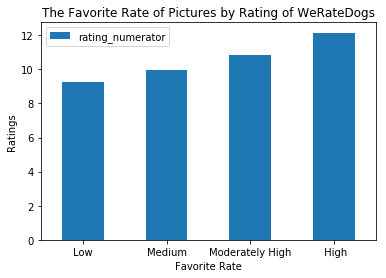

In [235]:
# Visualize the data of the scores obtained by favored pictures grouped into 4 levels
x_labels = ['Low', 'Medium', 'Moderately High', ' High']

favorite_year.plot(kind='bar', title='The Favorite Rate of Pictures by Rating of WeRateDogs');
plt.xticks([0, 1, 2, 3], x_labels);
plt.xlabel('Favorite Rate');
plt.ylabel('Ratings');
plt.xticks(rotation=0);